In [1]:
from pathlib import Path
import os
import json
script_dir = os.path.dirname(Path().absolute())
generated_snippets = json.load(open(os.path.join(script_dir, "ExtractiveSnipp/data/snippetsGenerated.txt")))
data_snippets = json.load(open(os.path.join(script_dir, "ExtractiveSnipp/data/snippets.txt")))


In [6]:
for idx, arguments in enumerate(data_snippets):
    arguments['index'] = idx
    # print(arguments)

# removing arguments with sentences less then 3
print(len(data_snippets))
count = 0
snipeet_senteces_len =  []
data_snippets_filtered = []
for argument_x in data_snippets:
    
    snip_len = len(argument_x['sentences'])
    snipeet_senteces_len.append(snip_len)
    if snip_len >= 3:
        data_snippets_filtered.append(argument_x)
        count = count + 1

print(count)

100
77


<AxesSubplot:>

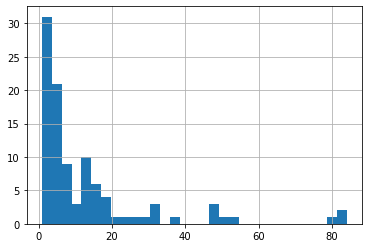

In [13]:
import pandas as pd
pd.Series(snipeet_senteces_len).hist(bins =31)

In [2]:
generated_snippets[0:2]

[{'id': 'abortion-01',
  'snippet-title': 'In the U.S. black women are 3.3 times likely to have an abortion than white women.',
  'snippets-text': ['Women who already had abortion earlier in there life time have abortion again.',
   'In the U.S. black women are 3.3 times likely to have an abortion than white women.'],
  'aspects': {'abortion': 0.5, 'women': 0.5},
  'sentences': "In 2011 there were about 730,322 abortions reported to the centers for disease control. There are about 1.7% of abortion of women's ages from 15-44 each year. Women who already had abortion earlier in there life time have abortion again. At the age of 45 a women will have at least one abortion. By the 12th week of pregnancies 88.7% of women have abortion. In the U.S. black women are 3.3 times likely to have an abortion than white women."},
 {'id': 'abortion-02',
  'snippet-title': 'Abortion is wrong!',
  'snippets-text': ['Abortion is wrong!', 'Abortion is MURDER!!!!'],
  'aspects': {'abortion': 1.0},
  'senten

In [3]:
arg_aspects = []
for arguments in generated_snippets:
    arg_aspects.append(arguments['aspects'])
len(arg_aspects)    

50

In [4]:
len(generated_snippets)

50

In [6]:
len(data_snippets)

100

In [7]:
type(data_snippets)

list

In [8]:
count = 0
data_snippets_filtered = []
for argument in data_snippets:

    # print(argument['sentences'])
    if len(argument['sentences']) > 2:
        data_snippets_filtered.append(argument)
        count = count + 1 
        
        
        
print(count)

77


In [9]:
data_snippets[0:2]

[{'topic': 'Abortion',
  'query': 'abortion',
  'arg_id': 'abortion-01',
  'sentences': ['In 2011 there were about 730,322 abortions reported to the centers for disease control.',
   "There are about 1.7% of abortion of women's ages from 15-44 each year.",
   'Women who already had abortion earlier in there life time have abortion again.',
   'At the age of 45 a women will have at least one abortion.',
   'By the 12th week of pregnancies 88.7% of women have abortion.',
   'In the U.S. black women are 3.3 times likely to have an abortion than white women.'],
  'snippet': ['Women who already had abortion earlier in there life time have abortion again.',
   'At the age of 45 a women will have at least one abortion.']},
 {'topic': 'Abortion',
  'query': 'abortion',
  'arg_id': 'abortion-02',
  'sentences': ['Abortion is wrong!',
   'Abortion Is gross!',
   'Abortion is MURDER!!!!'],
  'snippet': ['Abortion is wrong!', 'Abortion is MURDER!!!!']}]

In [11]:
len(data_snippets_filtered)

77

In [13]:
count = 0
for argument in data_snippets:
    if len(argument['sentences']) <= 2:
        count +=1
print(count)      

23


In [17]:
import pandas as pd
data_snippets_df = pd.json_normalize(data_snippets_filtered)
generated_snippets_df = pd.json_normalize(generated_snippets)


In [99]:
data_snippets_df.head()

,topic,query,arg_id,sentences,snippet
0,Abortion,abortion,abortion-01,"[In 2011 there were about 730,322 abortions re...",[Women who already had abortion earlier in the...
1,Abortion,abortion,abortion-02,"[Abortion is wrong!, Abortion Is gross!, Abort...","[Abortion is wrong!, Abortion is MURDER!!!!]"
2,Abortion,abortion,abortion-03,"[""The greatest destroyer of peace is abortion ...","[""The greatest destroyer of peace is abortion ..."
3,abortion,abortion,abortion-04,[Yes the government has the obligation to prot...,[Yes the government has the obligation to prot...
4,Abortion,abortion,abortion-05,"[Thank you, Pro., Negative Case A1: False equi...",[There is no child death involved in not getti...


In [20]:
len(data_snippets_df)

77

In [21]:
generated_snippets_df=generated_snippets_df=generated_snippets_df.iloc[:,0:3]
generated_snippets_df.head()

,id,snippet-title,snippets-text
0,abortion-01,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...
1,abortion-02,Abortion is wrong!,"[Abortion is wrong!, Abortion Is gross!]"
2,abortion-03,Abortion should be illegal because abortions a...,"[""The greatest destroyer of peace is abortion ..."
3,abortion-04,And the mothers life in danger doesn't always ...,[And the mothers life in danger doesn't always...
4,abortion-05,What this means is that: 1) Abortion is propos...,[How this occurred is that opponent originally...


In [22]:
# snippets_data = data_snippets_df.to_json(orient='records',lines=True)

In [23]:
data_snippets_df.head(2)

,topic,query,arg_id,sentences,snippet
0,Abortion,abortion,abortion-01,"[In 2011 there were about 730,322 abortions re...",[Women who already had abortion earlier in the...
1,Abortion,abortion,abortion-02,"[Abortion is wrong!, Abortion Is gross!, Abort...","[Abortion is wrong!, Abortion is MURDER!!!!]"


In [24]:
generated_snippets_df.head(2)

,id,snippet-title,snippets-text
0,abortion-01,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...
1,abortion-02,Abortion is wrong!,"[Abortion is wrong!, Abortion Is gross!]"


In [25]:
generated_snippets_df.insert(2,'generated_snippets',data_snippets_df['snippet'])

In [26]:
generated_snippets_df.head(2)

,id,snippet-title,generated_snippets,snippets-text
0,abortion-01,Women who already had abortion earlier in ther...,[Women who already had abortion earlier in the...,[Women who already had abortion earlier in the...
1,abortion-02,Abortion is wrong!,"[Abortion is wrong!, Abortion is MURDER!!!!]","[Abortion is wrong!, Abortion Is gross!]"


In [27]:
count = 0
for index, row in generated_snippets_df.iterrows():
                # x= dict object of aspect detected
                snippets_detected=row['generated_snippets']
                snippets_answer=row['snippets-text']
                #print(other_args_dict)
                for x in snippets_answer:
                    for y in snippets_detected:
                        #print(x)
                        #print(y)
                        #print("-------------")
                        if x==y:
                            count= count + 1
                            #print('match')

In [28]:
count

53

In [ ]:
accuracy =(100.0 * count)/ ( 2 * len(generated_snippets))
accuracy

In [ ]:
#import pickle5 as pickle
#with open("data/argumentAspectsDataset_df_re.pkl", "rb") as fh:
  #Arguments_df = pickle.load(fh)

In [ ]:
import pandas as pd 
Arguments_df = pd.read_pickle('data/ArgumentsDatasets.pkl')
Arguments_df.head(2)

In [ ]:
Arguments_df['arg_id'].nunique()

In [ ]:
arguments_datasets_aspects = Arguments_df['dict_weighted_args_dataset_list_re']
type(arguments_datasets_aspects[0])

In [ ]:
# from collections import OrderedDict
argument_similar_ids=[]
argument_similar_ids_count=[]

for dict_aspects in arg_aspects:
    print(dict_aspects)
    score=0
    arg_id_score= dict()
    arg_id_list=[]



    for aspect in dict_aspects:
        aspect_word_count=len(aspect.split())
        aspect_weight=dict_aspects[aspect]
        if aspect_weight >= 0.33:
            
            for index, row in Arguments_df.iterrows():
                    # x= dict object of aspect detected
                    other_args_dict= row['dict_weighted_args_dataset_list_re']

                    if aspect in other_args_dict and other_args_dict[aspect] >0.25:
                        arg_id=row['arg_id']
                        if arg_id in arg_id_score:
                            # print('match found')
                            # print(other_args_dict[aspect])
                        
                            # print(score)
                            # print(arg_id)
                            arg_id_score[arg_id]= score + other_args_dict[aspect]
                        #other_args_dict[aspect]= round(other_args_dict[aspect],2)
                        else:

                            score=other_args_dict[aspect]
                            arg_id_score[arg_id]=score
                            
    arg_id_score=dict(sorted(arg_id_score.items(), key=lambda item: item[1],reverse=True))
    
    #print(arg_id_score)
    argument_similar_ids.append(arg_id_score)
    #print(arg_id_score)
    
    argument_similar_ids_count.append(len(arg_id_score))
    print(len(arg_id_score))

In [ ]:
print(argument_similar_ids_count)

In [ ]:
import string
string.punctuation

In [ ]:
f = open("data\WikiAspects.txt", encoding='utf8')
aspect_list = f.read().lower().split('\n')
len(aspect_list)

In [ ]:
len(argument_similar_ids)

In [ ]:
len(argument_similar_ids[0])

In [ ]:
ArgumentativeText_args_list =[]
for argument_similar_ids_dict in argument_similar_ids:
    #print(len(argument_similar_ids_list))
    # take first 50 arguments
    argument_similar_ids_list = list(argument_similar_ids_dict.keys())
    if len(argument_similar_ids_list) <= 50: 
        argument_similar_ids_top = argument_similar_ids_list
    else:
        argument_similar_ids_top = argument_similar_ids_list[:50]  
        # print(type(argument_similar_ids_top)) 
    # print(len(argument_similar_ids_top))
    ArgumentativeText_args = []
    for argument_similar_id in argument_similar_ids_top:
        # print(argument_similar_id)
        ArgumentativeText = Arguments_df['text'][argument_similar_id] + Arguments_df['conclusion'][argument_similar_id]
        ArgumentativeText_args.append(ArgumentativeText)
    ArgumentativeText_args_list.append(ArgumentativeText_args)


In [ ]:
len(ArgumentativeText_args_list)

In [ ]:
ArgumentativeText_args_list[-1]

In [ ]:
 Arguments_df['conclusion'][10939]

In [ ]:
Arguments_df['conclusion'][10939] + Arguments_df['text'][10939] 